In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week5/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
# 데이터와 타겟 분리
x = df.drop('BMI', axis=1).values
y = df['BMI'].values

In [11]:
y = pd.get_dummies(y).values

In [13]:
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
x

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [21]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,681 (10.47 KB)

 Trainable params: 2,681 (10.47 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
N_EPOCHS = 30

history=model.fit(x=x_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
y_pred = model.predict(x_test)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.4223 - val_mse: 0.4223
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2059 - mse: 0.2059 - val_loss: 0.5193 - val_mse: 0.5193
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2528 - mse: 0.2528 - val_loss: 0.9292 - val_mse: 0.9292
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3339 - mse: 0.3339 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0956 - mse: 0.0956 - val_loss: 0.1834 - val_mse: 0.1834
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1640 - mse: 0.1640 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0530 - mse: 

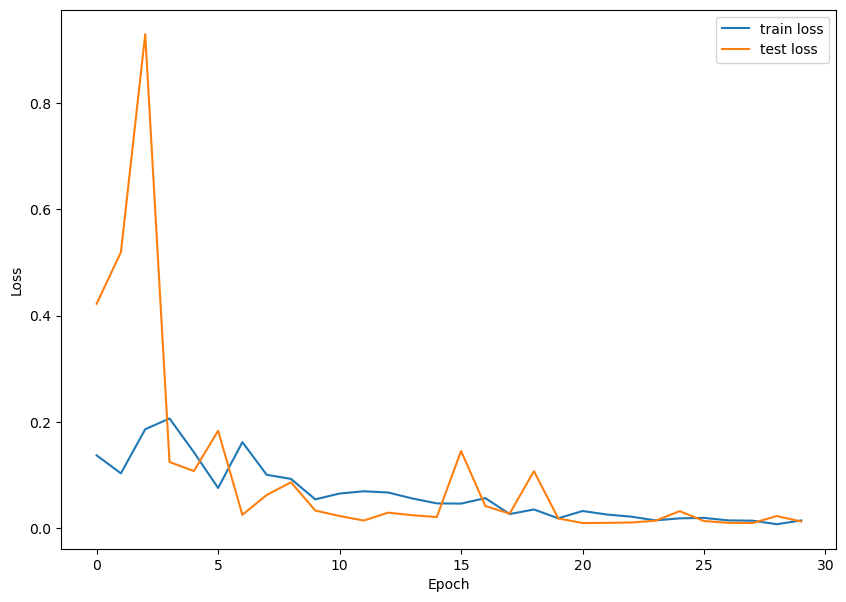

In [31]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - mse: 0.0088 


[0.008757048286497593, 0.008757048286497593]